# Medidas de tendencia central

### Media 
Se toma la suma de todos los elementos y se divide por el número de elementos, se escribe.
$$ \bar{x}=\frac{1}{N} \sum_{i=1}^N x_i  $$ 
- Esta medida es altamente sensible a valores atipicos, por lo que si presenta uno o mas esta medicion ya no representa de manera tan fiable la tendencia del conjunto de datos.

### Mediana(impar) 
suponga un conjunto ordenados de elementos de largo n `[1,2,3,4,5]` . La mediana se toma como la posición del elemento que está en la mitad de los elementos, esta posiciion sera la cardinalidad del conjunto ,(n+1)/2 y se escribe.
 $$ Mediana=x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par)
En el caso de que el conjunto ordenado n sea de cardinalidad par se toma como mediana el promedio de los 2 elementos centrales del conjunto.
 $$ Mediana=\frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda 
este e el elemento del conujo que mas re repite, se escribe.
 $ Moda =x_k $ donde $ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $
 - esta media no se recomienda usarla en conjuntos cotinuos

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [4]:
import pandas as pd
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


La funcion `df.head()` devuelve las primeras n filas.

Esta función devuelve las primeras n filas del objeto según la posición. Es útil para probar rápidamente si su objeto tiene el tipo correcto de datos.

Para valores negativos de n, esta función devuelve todas las filas excepto las últimas n filas, equivalente a `df[:-n]`.

inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:


 ### Media

In [5]:

df['price_usd'].mean()

6639.971021255604

### mediana

In [6]:
df['price_usd'].median()

4800.0

Tambien es posible hacer un histograma de frecuencias de una columna, donde en el eje x se encuentra el valor de la variable y en el eje y se encuentra la frecuencia de apariciones de ese valor.

<AxesSubplot:ylabel='Frequency'>

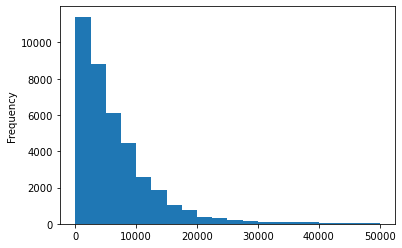

In [7]:
df['price_usd'].plot.hist(bins=20)
# donde bins es la cantidad de columnas que apareceran en el histograma

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html


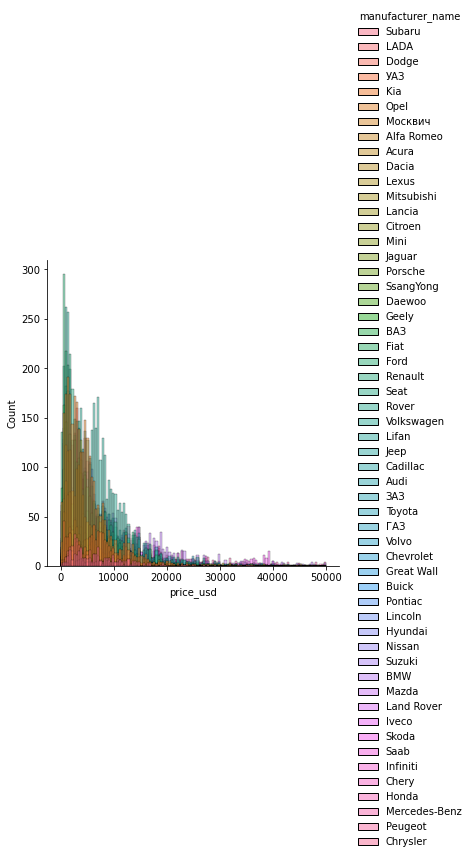

In [8]:
import seaborn as sns

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')

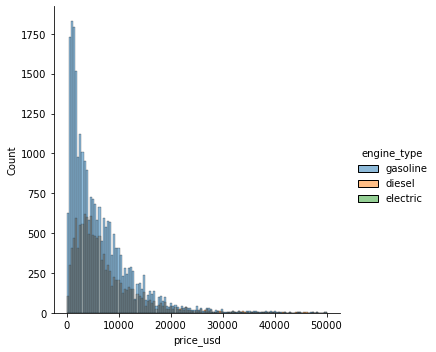

In [9]:
sns.displot(df,x="price_usd",hue="engine_type")

Para crear un grafico mas claro se usa:

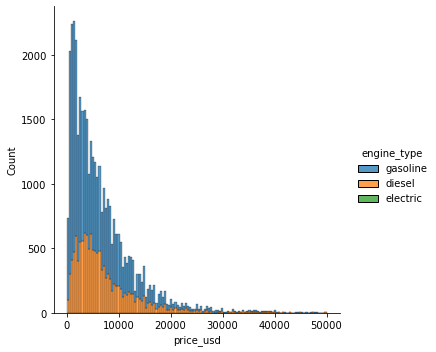

In [10]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

Para realizar un conteo de la cantidad de elementos que tiene una variable, se usa:

In [11]:
df.groupby('engine_type').count()


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


Se puede hacer un histograma de una categoria en especifica como en este caso se toman los datos de los autos audi Q7 y se muestra un histograma de frecuencias del precio de estos autos, adicionalmente se hace una segmentacion por el año en que fueron producidos, de aqui se puede establecer una relacion evidente respecto al precio y el año producido. 

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

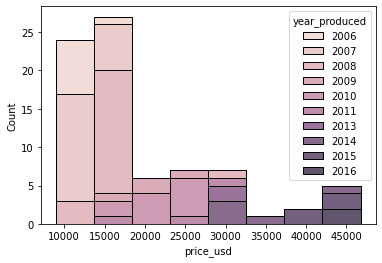

In [12]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced', multiple="stack")

Hacemos algo similar pero ahora con los autos cuyo motor sea electrico, y resaltamos el nombre del fabricante

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

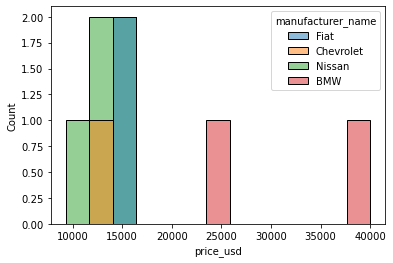

In [13]:
electric_df = df[df['engine_type']=='electric']
sns.histplot(electric_df,x="price_usd",hue="manufacturer_name")

otra posibibildad es un histograma de precio de los modelos de auto de un solo fabricante, haciendo esto podemos darnos una idea de que modelos son los mas caros, y que modelos son los mas baratos.

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

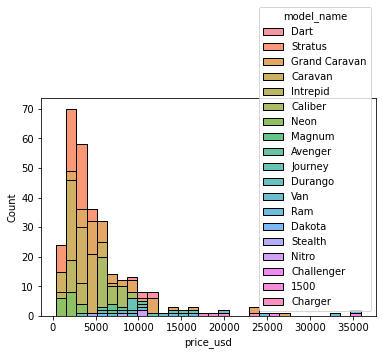

In [15]:
dodge_df = df[df['manufacturer_name']=='Dodge']
sns.histplot(dodge_df,x="price_usd",hue="model_name",multiple="stack")